<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# 1 Some nomenclature

figures are the full diagram which plots are located, while axes are used to plot points for use in a graph.  
in the pyplot interface, `plt.twinx()` is used to add additional axes

# 2 Comparing the two ‘dialects’

### pyplot Interface

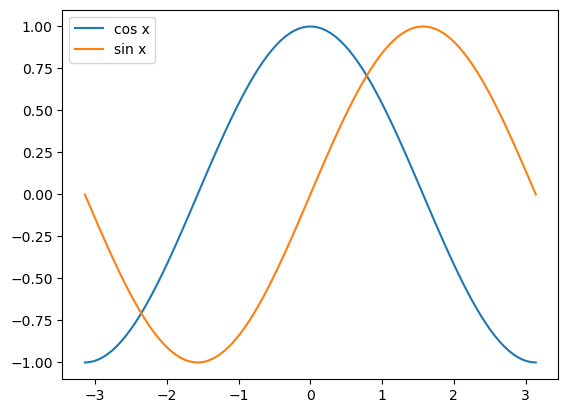

In [5]:
x = np.linspace(-np.pi, np.pi, num=100) # generates 100 evenly spaced points between -pi and pi
cos_x = np.cos(x)
sin_x = np.sin(x)
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

additional `plt.plot()` will plot on the same figure

### OO Interface

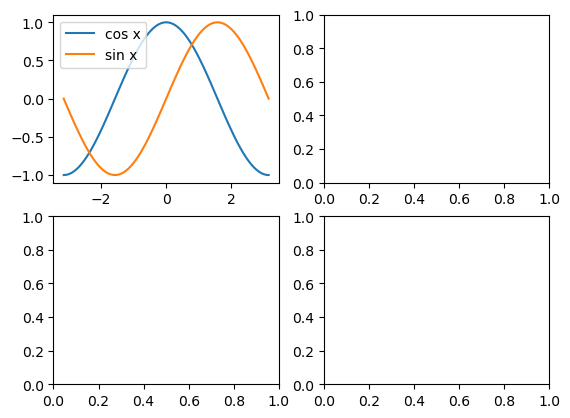

In [29]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
fig, ax = plt.subplots(nrows=2, ncols=2) # each subplot (ax) is a separate object that can be controlled. number of subplots defined by (nrows * ncols)
#type(ax) ax is an array with 2 columns and rows that can be called by their indices
#type(fig) fig is a matplotlib figure
ax[0,0].plot(x, cos_x, label='cos x') # if more than 1 row and column, select the relevant subplot using [x,y] (indices)
ax[0,0].plot(x, sin_x, label='sin x')
ax[0,0].legend()

the OO interface goes "one layer deeper" compared to the `pyplot` interface, allowing for more fine control over axes and other elements in a plot
- `ax.spines['top, bottom, left, and/or right']` can be used to modify the axes (e.g. `set_visibility()` to control whether they can be seen)

`plt.subplots()` is used to generate a figure and axis in the object-oriented interface. these are assigned to the objects `fig` and `ax` using `=`  
the number of rows and columns can then be specified, creating `nrows * ncols` subplots  
subsequently, `ax` can be used to access individual subplots to plot and modify them  
note that `ax` and pyplot objects have different attributes (e.g. `plt.xlabel` is valid but not `ax.xlabel`)

# 3 What is OO ax, really?

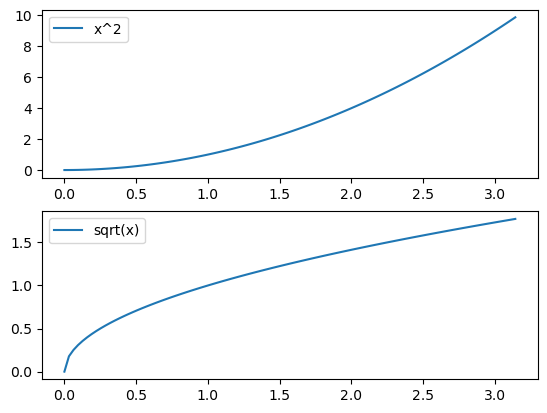

In [31]:
x = np.linspace(0, np.pi, num=100)
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, x**2, label='x^2')
ax[1].plot(x, np.sqrt(x), label='sqrt(x)')

ax[0].legend()
ax[1].legend()

In [33]:
print(type(ax)) # ax is an array
print(type(fig)) # fig is a matplotlib figure
print(ax.shape) # ax is a 1D array with 2 entries
print(type(ax[1])) # the ax array stores matplotlib Axes

<class 'numpy.ndarray'>
<class 'matplotlib.figure.Figure'>
(2,)
<class 'matplotlib.axes._axes.Axes'>


OO axes (the object aka individual subplots) are stored as a numpy array and can be accessed by indexing.  
other features can be investigated with `type()`, `.shape` etc.

# 4 A complete OO example

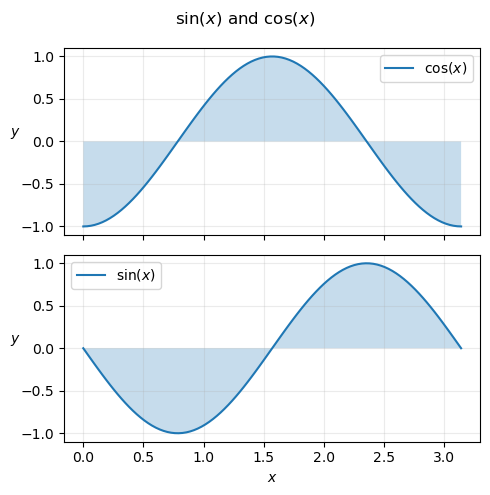

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=1, # plot a figure with 2 axes in 2 rows and 1 column
                       figsize=(5, 5), # set the figure size to 5 inches by 5 inches figsize=(x,y)
                       sharex=True) # both plots share the same x axis


ax[0].plot(x, cos_x, label=r'$\cos(x)$') # plot in the subplot with index 0 in ax (an array)
ax[0].fill_between(x, 0, cos_x, alpha=.25) # shade for the full range of x, bounded by y=0 and the plot with .25 transparency
ax[1].plot(x, sin_x, label=r'$\sin(x)$') # note the use of rawstrings in label to write mathematical symbols/functions
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax: # for loop to draw grids and y-label for each plot (otherwise they will have to be manually set for each plot
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)


ax[1].set_xlabel('$x$') # setting the shared x axis label outside of the loop (only need to be done once)

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') # supertitle for the figure, equivalent to plt.title() in the pyplot interface

fig.tight_layout() # reduces the space between the two plots and makes other cosmetic adjustments

Text(0.5, 0.98, '$\\sin(x)$ and $\\cos(x)$')

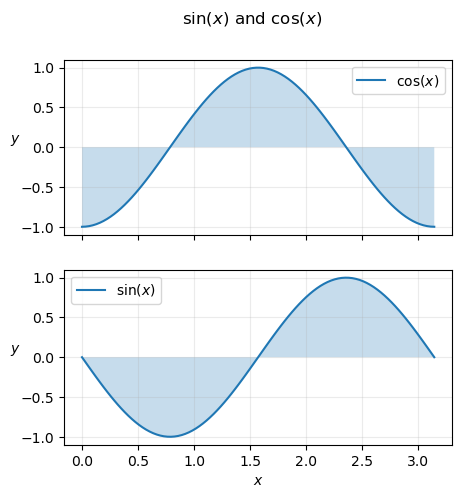

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=1, # plot a figure with 2 axes in 2 rows and 1 column
                       figsize=(5, 5), # set the figure size to 5 inches by 5 inches figsize=(x,y)
                       sharex=True) # both plots share the same x axis


ax[0].plot(x, cos_x, label=r'$\cos(x)$') # plot in the subplot with index 0 in ax (an array)
ax[0].fill_between(x, 0, cos_x, alpha=.25) # shade for the full range of x, bounded by y=0 and the plot with .25 transparency
ax[1].plot(x, sin_x, label=r'$\sin(x)$') # note the use of rawstrings in label to write mathematical symbols/functions
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax: # for loop to draw grids and y-label for each plot (otherwise they will have to be manually set for each plot
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)


ax[1].set_xlabel('$x$') # setting the shared x axis label outside of the loop. equivalent to plt.xlabel() in the pyplot interface

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') # supertitle for the figure, equivalent to plt.title() in the pyplot interface

#fig.tight_layout() # reduces the space between the two plots

`figsize(x,y)` allows us to customise the size of the figure (axis)

# 5 Multiple rows and columns

### Using ax

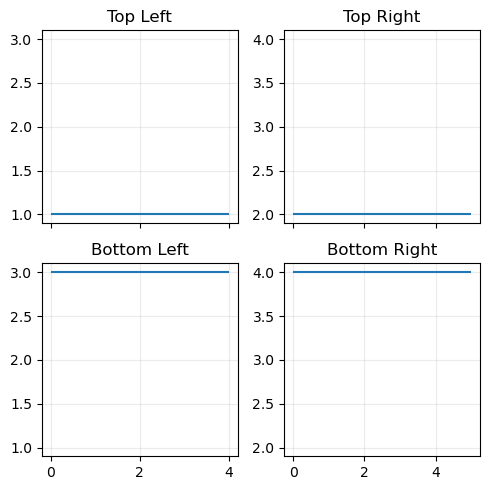

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2, # 2x2 subplots stored as separate elements in ax (array)
                       figsize=(5, 5),
                       sharex='col', sharey='col') # sharing x and y axes by column
# without sharing axes, all subplots will be autoscaled to show the hline in the middle (even though their y-values are different)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()
# .flatten() flattens the array from 2D (initially 2,2) to a 1D array and lays out its elements from top to bottom, left to right
# unpacking can then happen to 4 different objects which can be named for greater clarity -- each represents a subplot

# labelling the subplots with .set_title('title')
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

#drawing horizontal lines at various y values. note the right side subplots have xmax=5, these are reflected in the subplots where the lines extend beyond x=4
top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten(): 
    a.grid(alpha=.25)

plt.tight_layout()

`ax.flatten()` allows subplots to be assigned to variables for easier manipulation (e.g. of axes)
- `.flatten()` reduces the dimension of the ax (normally in a 2D array for rows and columns) to one dimension, allowing it to be unpacked to variables
- flattening 2D entries occurs diagramatically: assigned from left to right, from the top to the bottom row of subplots
- in terms of arrays: all elements in first entry, all elements in second entry etc.

## 5.1 Sharing axes

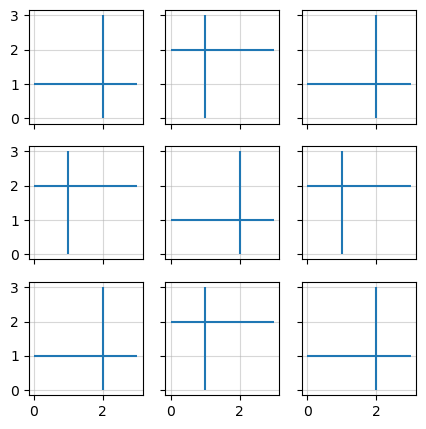

In [70]:
fig, ax = plt.subplots(
    nrows=3, ncols=3,
    figsize=(5, 5),
    sharex='col', sharey=True
)
count=0
a,b,c,d,e,f,g,h,i=ax.flatten()
for n in ax.flatten():
    count+=1
    n.grid(alpha=.5)
    if count%2 == 1:
        n.hlines(y=1, xmin=0, xmax=3)
        n.vlines(x=2, ymin=0, ymax=3)
    else:
        n.hlines(y=2, xmin=0, xmax=3)
        n.vlines(x=1, ymin=0, ymax=3)

`plt.subplots` can be used in combination with `sharey='col'` or `sharex='col'` 
to make subplots in the same columns have the same y and x-axis respectively (conversely `'row'` will make subplots in the same row share the same axes)  
setting `True` for `sharex` or `sharey` will make ALL the subplots share the same x and y axes

## 5.2 Accessing all axes

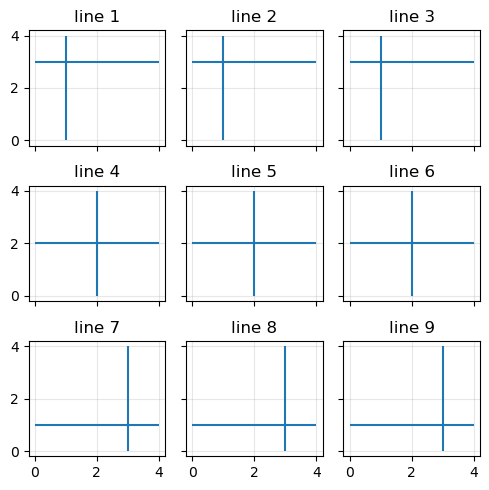

In [68]:
fig, ax = plt.subplots(
    nrows=3, ncols=3,
    figsize=(5, 5),
    sharex='col', sharey=True
)
count=0
a,b,c,d,e,f,g,h,i=ax.flatten()
for n in ax.flatten():
    count+=1
    if count <= 3:
        n.hlines(y=3, xmin=0, xmax=4)
        n.vlines(x=1, ymin=0, ymax=4)
    elif 4 <= count <= 6:
        n.hlines(y=2, xmin=0, xmax=4)
        n.vlines(x=2, ymin=0, ymax=4)
    else:
        n.hlines(y=1, xmin=0, xmax=4)
        n.vlines(x=3, ymin=0, ymax=4)
    n.grid(alpha=.3)
    n.set_title(f'line {count}')

plt.tight_layout() # this actually fixes a lot of cosmetic errors in this plot...

changes to all axes can be done through a `for` loop, leveraging how `.flatten()` creates a 1D array which can be utilised in a loop

# 6 Other useful plots

## 6.1 Histograms

### Data

data can be loaded into arrays using `np.loadtxt(filename, skiprows=)`, specifying filename and `skiprows` as needed.

### A quick helper function

In [73]:
def get_plot_data():
    data = {} # defines data as a dictionary
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) # first row header, key 'All' now has the value of all.csv loaded into an array

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1) # first row header, key 'NUS' now has the value of nus.csv loaded into an array

    return data

`data` is defined as a dictionary, and the keys `'All'` and `'NUS'` are tagged to their datasets in a key-value structure by loading the datasets into the dictionary values and assigning keys to them

### The histogram

Text(0.5, 1.0, 'Mean earnings of students')

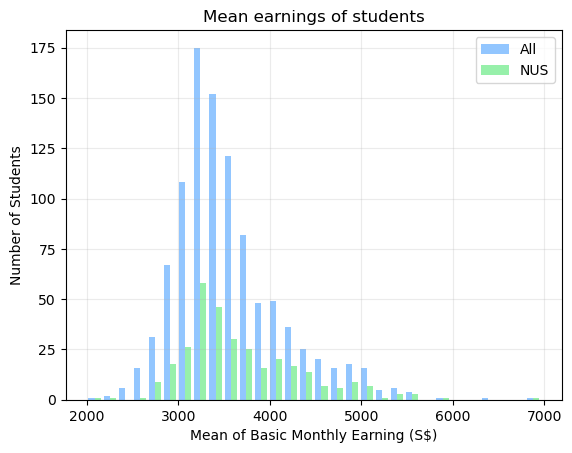

In [82]:
plt.style.use('seaborn-v0_8-pastel')
data = get_plot_data()

# bins specifies how many bins to split the data -- higher numbers provides more granular ranges but might distort the shape/readability
plt.hist([data['All'], data['NUS']], bins=30, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Monthly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(alpha=.25)
plt.title('Mean earnings of students')

`plt.hist()` can plot the style as a histogram (frequency measurements) with the following arguments:
- data file(s) used to plot the histogram
- `bins` allows specification of bin size (number of sub-measurements in each spine of the axis), larger = more detail in the data but may distort overall shape

## 6.2 Scatter plots

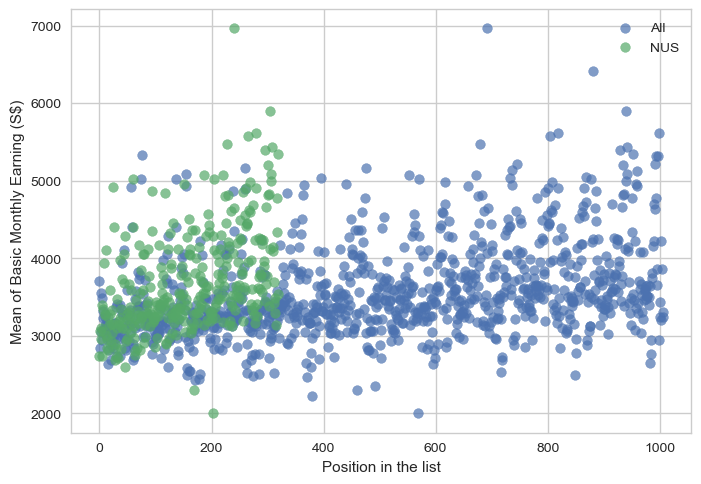

In [89]:
plt.style.use("seaborn-v0_8-whitegrid")

data = get_plot_data()

for label, numbers in data.items(): # .items() unpacks the dictionary to give both the key and the value
    x = range(len(numbers)) # x uses range() to get a list of numbers as long as the dataset
    y = numbers # y is the full list of numbers, corresponding to their respective index in x
    plt.scatter(x, y, label=label, alpha=.7) # these are plotted to a scatter plot. the loop repeats and does the same for 'All' and 'NUS'

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Monthly Earning (S$)')
plt.legend()

`plt.scatter()` can be used to plot a scatter plot
- `label=label` is used because the function argument is called `label` but the `for` loop employs the `label` variable to store the dict keys

## 6.3 Bar charts

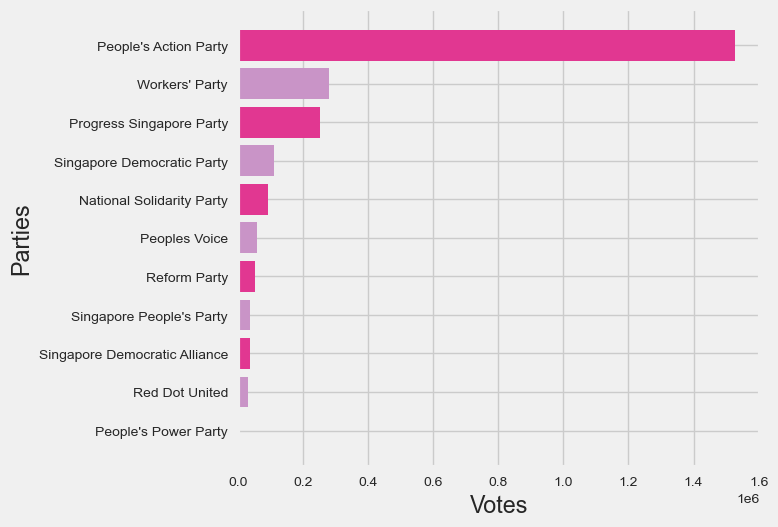

In [106]:
election_results = {'People\'s Action Party': 1527491,
                   'Workers\' Party': 279922,
                   'Progress Singapore Party': 253996,
                   'Singapore Democratic Party': 111054,
                   'National Solidarity Party': 93653,
                   'Peoples Voice': 59183,
                   'Reform Party': 54599,
                   'Singapore People\'s Party': 37998,
                   'Singapore Democratic Alliance': 37237,
                   'Red Dot United': 31260,
                   'People\'s Power Party': 7489
                   }
parties = list(election_results.keys())
votes = list(election_results.values())

plt.style.use('fivethirtyeight')
plt.barh(parties, votes, color=['#e13791','#c994c7'])
plt.xlabel('Votes')
plt.ylabel('Parties')
plt.gca().invert_yaxis() # searched this online as a fix to the horizontal bar chart displaying the results from last to first dict entry

plt.tight_layout()

`plt.bar(x_labels, y_frequency)` can be used to plot a bar chart:
- x_labels should be replaced with a list of x-axis labels
- y_frequency should be replaced with a list of similar size with readings corresponding to the indices of the x-axis label list
- `color=[]` can also be used to customise the colors of the bar chart. if the colors are fewer than the size of the x_labels, the colors will repeat from the first color

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of votes for each party')

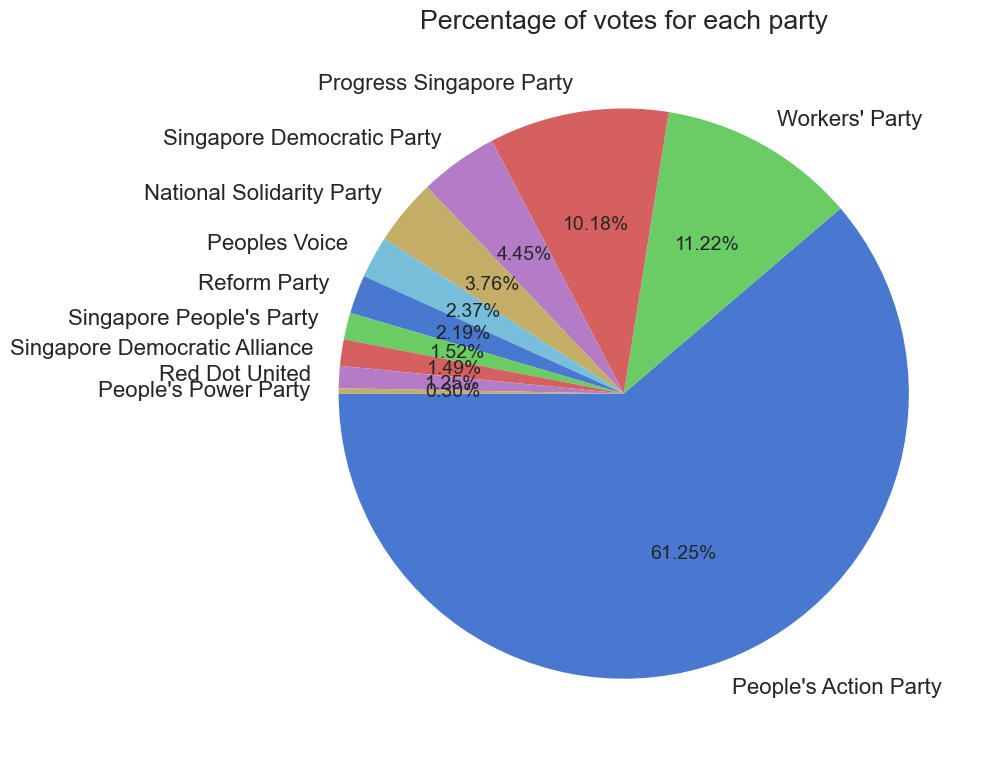

In [126]:
election_results = {'People\'s Action Party': 1527491,
                   'Workers\' Party': 279922,
                   'Progress Singapore Party': 253996,
                   'Singapore Democratic Party': 111054,
                   'National Solidarity Party': 93653,
                   'Peoples Voice': 59183,
                   'Reform Party': 54599,
                   'Singapore People\'s Party': 37998,
                   'Singapore Democratic Alliance': 37237,
                   'Red Dot United': 31260,
                   'People\'s Power Party': 7489
                   }
parties = list(election_results.keys())
votes = list(election_results.values())

plt.style.use('seaborn-v0_8-poster')
plt.pie(votes, 
        labels=parties,
        autopct='%2.2f%%',   # How to format the percentages
        startangle=180                
        )
plt.title('Percentage of votes for each party')

`plt.pie()` is used to plot pie charts with the following arguments:
- the frequencies of each slice in the pie chart as a list
- the labels for each slice in the pie chart (corresponding to index of the frequencies) as a list
- `autopct='%x.xf%` displays the percentages to x decimal places
- `startangle=n` allows for counterclockwise rotation of the pie chart by n degrees (negative value = clockwise)

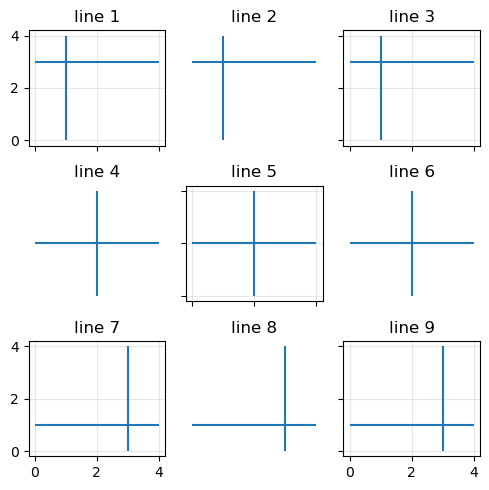

In [3]:
# trying to hide some plots in a OO interface fig
fig, ax = plt.subplots(
    nrows=3, ncols=3,
    figsize=(5, 5),
    sharex='col', sharey=True
)
count=0
a,b,c,d,e,f,g,h,i=ax.flatten()
for n in ax.flatten():
    count+=1
    if count <= 3:
        n.hlines(y=3, xmin=0, xmax=4)
        n.vlines(x=1, ymin=0, ymax=4)
    elif 4 <= count <= 6:
        n.hlines(y=2, xmin=0, xmax=4)
        n.vlines(x=2, ymin=0, ymax=4)
    else:
        n.hlines(y=1, xmin=0, xmax=4)
        n.vlines(x=3, ymin=0, ymax=4)
    n.grid(alpha=.3)
    n.set_title(f'line {count}')

ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,2].axis('off')
ax[2,1].axis('off')
# plots are hidden (invisible) but the object is still there -- the elements inserted in the for loop are still present

plt.tight_layout() # this actually fixes a lot of cosmetic errors in this plot...